# Individual Project Planning

### 1. Data Description

**Players Data Set**: The players.csv data set describes data regarding individual players of the game, including:
- **experience**: Describes the players experience with the game as either "Pro", "Veteran", "Regular", or "Amateur".
- **subscribe**: Displays "TRUE" if the player is subscribed to the newsletter, and "FALSE" if they are not.
- **hashedEmail**: The hashed email (privacy safe way of displaying email) of the player. 
- **played_hours**: Amount of time (hours) player played during all sessions.
- **name**: Players first name
- **gender**: Players gender as Female, Male, or Non-Binary. 
- **Age** Players age in years

**Sessions Data Set**: The sessions.csv data set describes data regarding individual players of th game, including:
- **hashedEmail**: The hashed email (privacy safe way of displaying email) of the player.
- **start_time**: The date in the format DD/MM/YYYY, and the time in military time the player began their playing session
- **end_time**: The date in the format DD/MM/YYYY, and the time in military time the player ended their playing session
- **original_start_time**:
- **original_end_time**:

### 2. Questions
**Broad Question**: The broad question I want to adress with this project is **What "kinds" of players are most likely to contribute a large amount of data so that they can be targeted in recruiting efforts?** 

**Specific Question**: The specific question I want to adress with this project is **Can Age, gender, and experience predict played_hours in the players.csv data set?** 

### 3. Exploratory Data Analysis and Visualization

**Loading in and tidying the players.csv and sessions.csv data sets:**

In [7]:
library(tidyverse)
players_data <- read_csv("https://raw.githubusercontent.com/emilyk-05/individual_project_planning/refs/heads/main/players.csv")
head(players_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [9]:
sessions_data <- read_csv("https://raw.githubusercontent.com/emilyk-05/individual_project_planning/refs/heads/main/sessions.csv")
head(sessions_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [10]:
sessions_data_separate <- separate(sessions_data,
    col = start_time, 
    into = c("start_date", "start_time"), 
    sep = " ") |>
separate(
    col = end_time, 
    into = c("end_date", "end_time"),
    sep = " ")
head(sessions_data_separate)

hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024,03:22,25/07/2024,03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024,16:01,25/05/2024,16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024,15:08,23/06/2024,17:10,1.71916e+12,1.71916e+12


**Summary Statistics of players.csv data set:**

In [13]:
mean_players_data <- summarize(players_data,
                               mean_played_hours = mean(played_hours),
                               mean_age = mean(Age, na.rm = TRUE))
                               
mean_players_data    

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


|Quantitative Variable |Mean Value | Units |
|----------------------|-----------|-------|
|played_hours          |  5.8459   | hours |
|age                   | 21.1392   | years |

**Visualizations**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message in plot_theme(plot):
“The `test` theme element is not defined in the element hierarchy.”


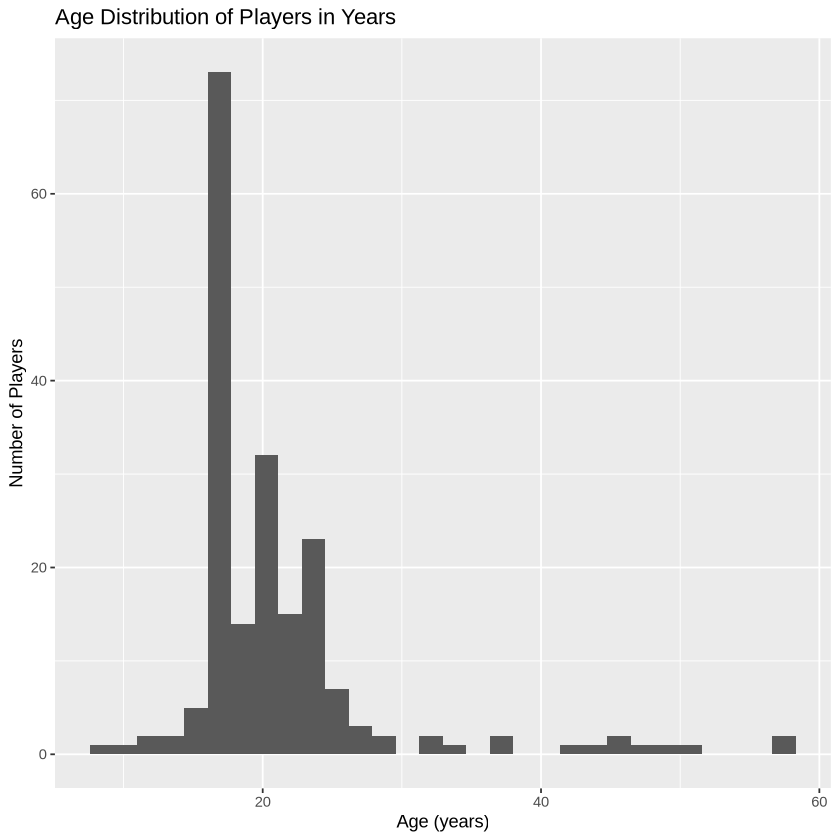

In [25]:
age_distribution <- players_data |>
    ggplot(aes(x = Age)) +
            geom_histogram() +
            xlab( "Age (years)") +
            ylab ("Number of Players")+
            ggtitle("Age Distribution of Players in Years") +
            theme(test = element_text(size = 70))
age_distribution

### 4. Methods and Plan

### 5. Git Hub Repository 